In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Output.csv')

In [3]:
df.head()

,Unnamed: 0,eval/f1,eval/loss,train/loss,Name
0,0,0.301994,0.586029,0.6466,./results/sentiment_analysis/lstm-model/runs/e...
1,1,0.403449,0.731720,0.3121,./results/sentiment_analysis/lstm-model/runs/e...
2,2,0.346905,1.197781,0.1365,./results/sentiment_analysis/lstm-model/runs/e...
3,3,0.320561,1.434363,0.0598,./results/sentiment_analysis/lstm-model/runs/e...
4,4,0.362382,1.609720,0.0109,./results/sentiment_analysis/lstm-model/runs/e...


In [4]:
df['Task'] = df['Name'].apply(lambda x: x.split('/')[2])
df['Model'] = df['Name'].apply(lambda x: x.split('/')[3])

In [5]:
df.head()

,Unnamed: 0,eval/f1,eval/loss,train/loss,Name,Task,Model
0,0,0.301994,0.586029,0.6466,./results/sentiment_analysis/lstm-model/runs/e...,sentiment_analysis,lstm-model
1,1,0.403449,0.731720,0.3121,./results/sentiment_analysis/lstm-model/runs/e...,sentiment_analysis,lstm-model
2,2,0.346905,1.197781,0.1365,./results/sentiment_analysis/lstm-model/runs/e...,sentiment_analysis,lstm-model
3,3,0.320561,1.434363,0.0598,./results/sentiment_analysis/lstm-model/runs/e...,sentiment_analysis,lstm-model
4,4,0.362382,1.609720,0.0109,./results/sentiment_analysis/lstm-model/runs/e...,sentiment_analysis,lstm-model


In [6]:
import numpy as np
np.unique(df['Model'])

array(['bert-base', 'distilbert-base', 'finbert-base', 'lstm-model',
       'pretrain-bert-base', 'pretrain-bert-base-train'], dtype=object)

In [7]:
model_naming = dict(zip(['bert-base', 'distilbert-base', 'finbert-base', 'lstm-model',
       'pretrain-bert-base', 'pretrain-bert-base-train'],['BERT','DistilBERT','FinBERT','LSTM','BERT-PT','BERT-PT-TR']))

In [8]:
df.rename({'Unnamed: 0':'steps'}, axis=1, inplace=True)

In [9]:
df['Model Name'] = df['Model'].apply(model_naming.get)

In [10]:
risk_profiling = df[df['Task']=='risk_profiling']
sentiment_analysis = df[df['Task']=='sentiment_analysis']

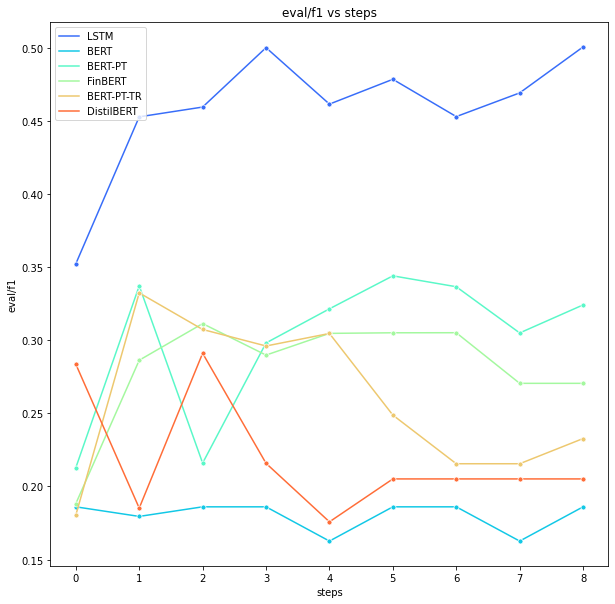

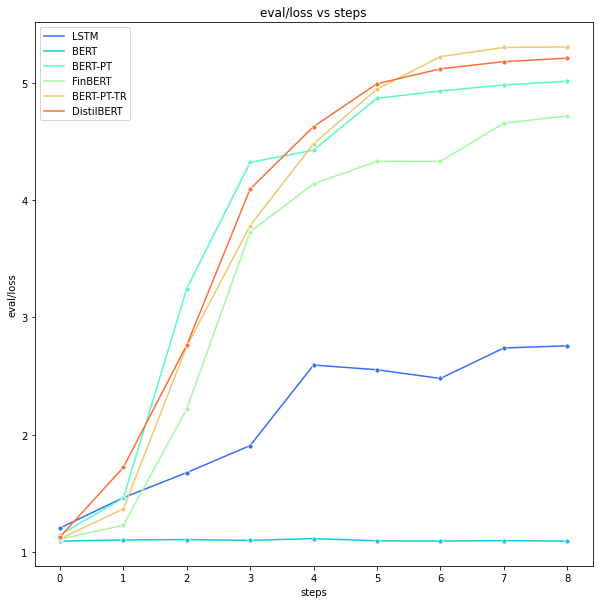

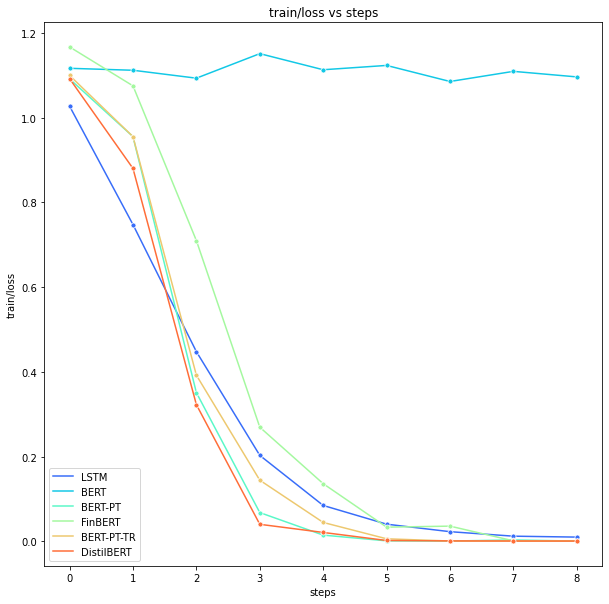

In [24]:
for value in ['eval/f1','eval/loss','train/loss']:
    sns.lineplot(x='steps',y=value, data = risk_profiling, hue='Model Name',marker='o',markersize=5, palette='rainbow')
    plt.gcf().set_size_inches((10,10))
    plt.title(f"{value} vs steps")
    if 'eval' in value:
        plt.legend(loc='upper left')
    else:
        plt.legend(loc='lower left')
    plt.savefig(f'graphs/curves/risk_profiling_{value.replace("/","_")}.png')
    plt.show()

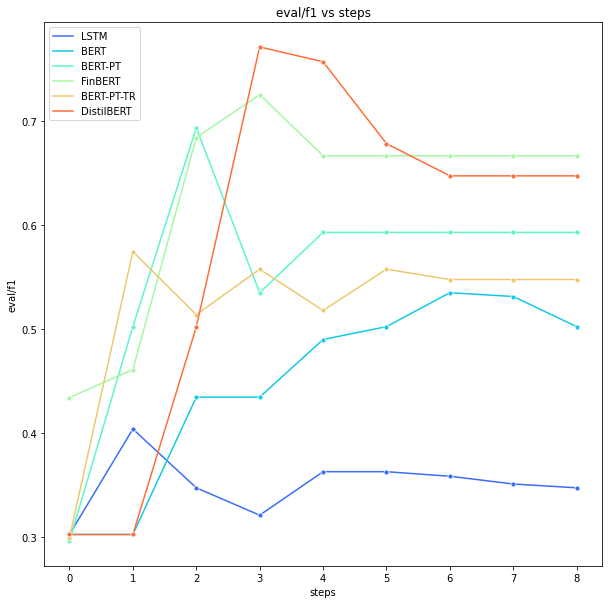

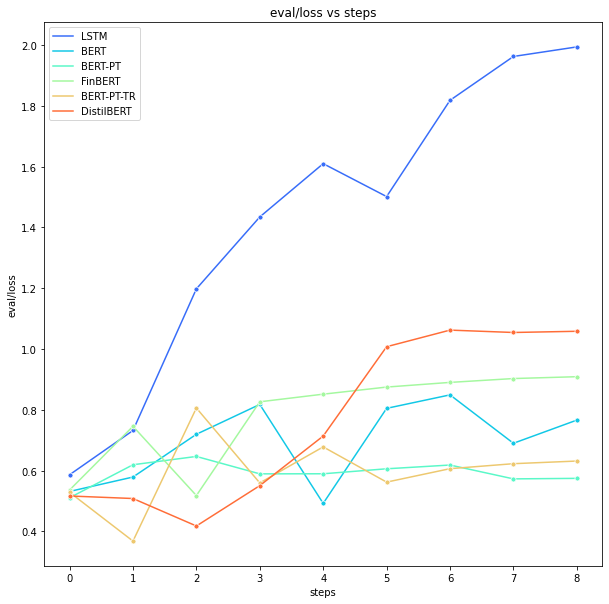

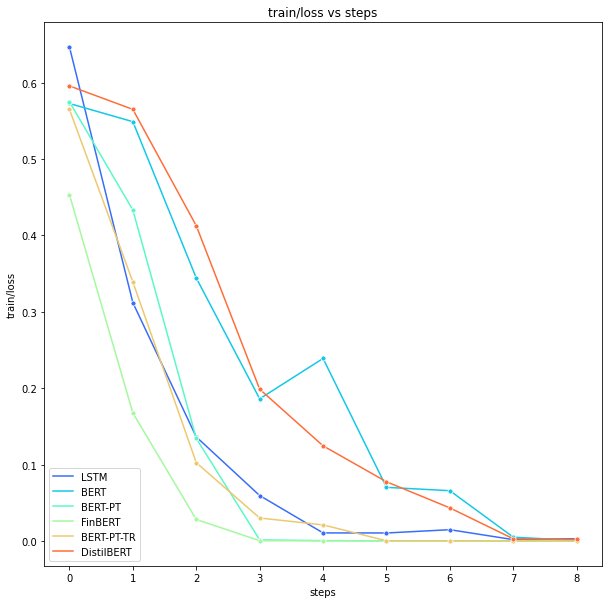

In [26]:
for value in ['eval/f1','eval/loss','train/loss']:
    sns.lineplot(x='steps',y=value, data = sentiment_analysis, hue='Model Name',marker='o',markersize=5, palette='rainbow')
    plt.gcf().set_size_inches((10,10))
    plt.title(f"{value} vs steps")
    if 'eval' in value:
        plt.legend(loc='upper left')
    else:
        plt.legend(loc='lower left')
    plt.savefig(f'graphs/curves/sentiment_analysis_{value.replace("/","_")}.png')
    plt.show()